1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

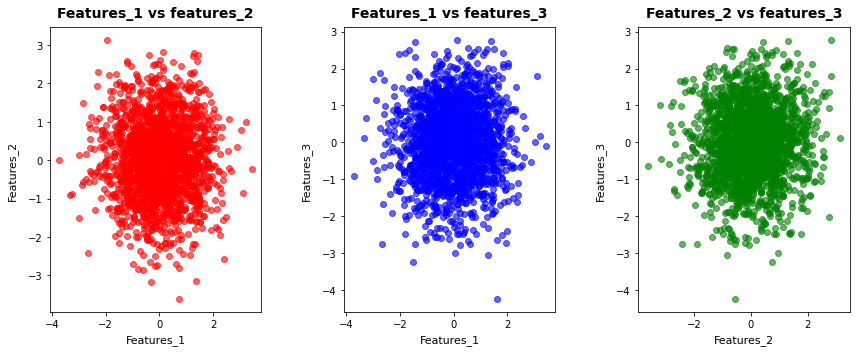

In [254]:

file_name= "regression_generated.csv"
data = pd.read_csv(file_name)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

ax1.scatter(x=data['features_1'], y=data['features_2'], marker='o', c='r',alpha=0.6)
ax1.set_title('Features_1 vs features_2', fontsize=14,  fontweight ="bold", pad=10)
ax1.set_xlabel('Features_1',size = 11, labelpad=5)
ax1.set_ylabel('Features_2',size = 11, labelpad=10)

ax2.scatter(x=data['features_1'], y=data['features_3'], marker='o', c='b',alpha=0.6)
ax2.set_title('Features_1 vs features_3', fontsize=14, fontweight ="bold", pad=10)
ax2.set_xlabel('Features_1',size = 11, labelpad=5)
ax2.set_ylabel('Features_3',size = 11, labelpad=10)

ax3.scatter(x=data['features_2'], y=data['features_3'], marker='o', c='g',alpha=0.6)
ax3.set_title('Features_2 vs features_3', fontsize=14,  fontweight ="bold",pad=10)
ax3.set_xlabel('Features_2',size = 11, labelpad=5)
ax3.set_ylabel('Features_3',size = 11, labelpad=10)

fig.tight_layout(w_pad=4)

#these features are not corrlated

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

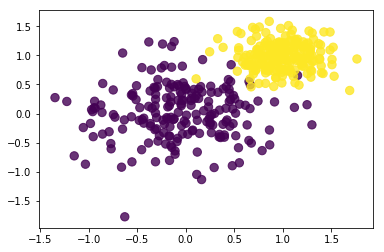

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

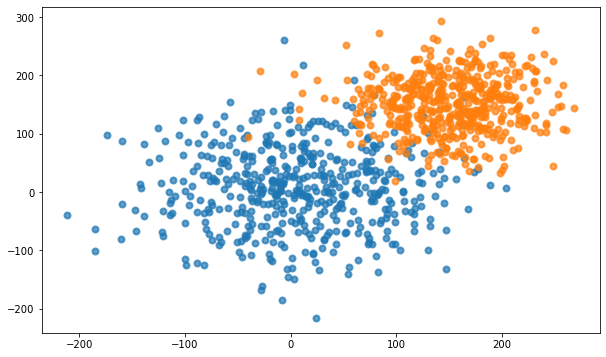

In [5]:
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np
npr.seed(123)

n=500
c1 = np.random.normal(10,70,(n,2))
c2 = np.random.normal(150,50,(n,2))

fig = plt.figure(figsize=(10, 6))
plt.scatter(c1[:,0],c1[:,1],alpha=0.7,linewidths=2)
plt.scatter(c2[:,0],c2[:,1],alpha=0.7,linewidths=2)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

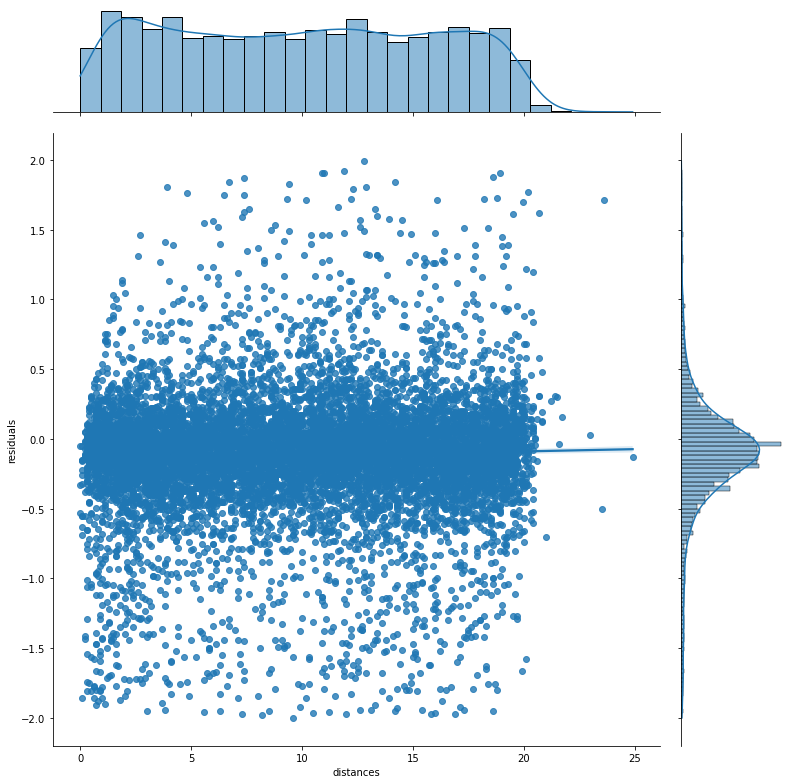

In [73]:
#Plot a Seaborn jointplot of "residuals" versus "distances"

import pickle

# define the data structure
file_pkl = open('./data/residuals_261.pkl', 'rb')
new_dict = pickle.load(file_pkl)
file_pkl.close()

df = pd.DataFrame(new_dict.tolist())
df = df[abs(df['residuals'])< 2]
df = df.reset_index(drop=True)

#sns.pairplot(df)
sns.jointplot(data=df, y='residuals', x='distances', kind="reg",height=11,ratio=5) # perform a regression on the data

#there is no correlation between distances and residuals variables

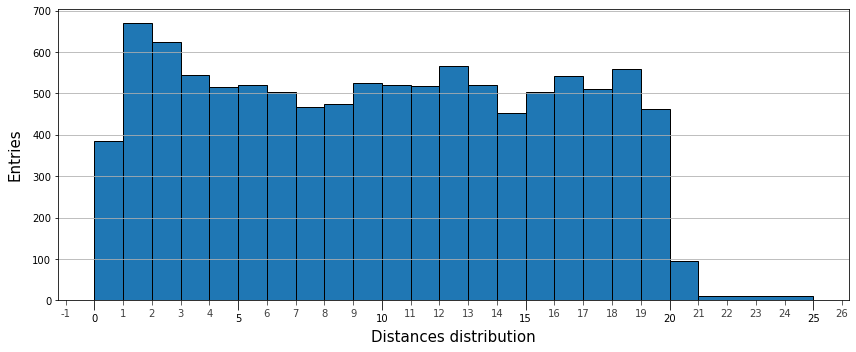

In [225]:
#Create manually the profile histogram for the "distance" variable
from matplotlib.ticker import  MultipleLocator, FormatStrFormatter, AutoMinorLocator

bins = [x for x in range(0,22)]
bins.append(25) #one last bigger bin

fig = plt.figure(figsize=(12, 5)) 
h, bins, _ = plt.hist(df['distances'], bins = bins, edgecolor = "black")
ax = fig.axes[0]

#options to add ticks and grid
ax.tick_params(axis='x',which='major', length=10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))

ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.grid()

#labels
ax.set_xlabel('Distances distribution', size = 15, labelpad  = 6)
ax.set_ylabel('Entries', size = 15, labelpad  = 10)

#plot
fig.tight_layout()


In [226]:
#arrays to find
x = 0.5*(bins[1:] + bins[:-1])
y = []
err_y = []

for i in range(len(bins)-1):
    temp = df[(df['distances']>=bins[i]) & (df['distances']<bins[i+1])]
    temp = temp['residuals']
    y.append(np.mean(temp))
    err_y.append(np.std(temp))

x = np.array(x)
y = np.array(y)
err_y = np.array(err_y)

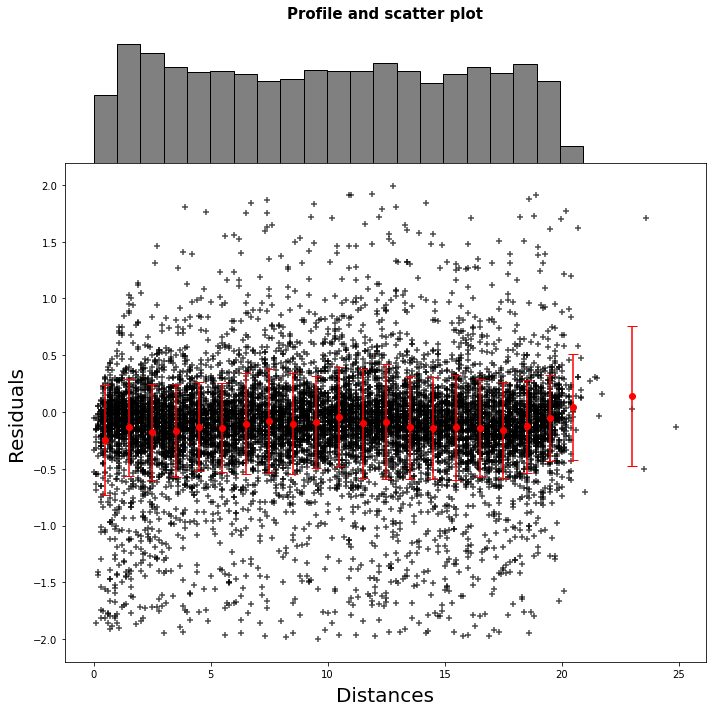

In [227]:
#Plot the profile plot on top of the scatter plot

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 1, height_ratios=(1, 4), hspace =0.0)

#profile histogram
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.hist(df['distances'], bins = bins, density=True, edgecolor = "black", color ='grey')
#options
ax_histx.get_xaxis().set_ticks([])
ax_histx.get_yaxis().set_ticks([])
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['left'].set_visible(False)

#scatter plot
ax = fig.add_subplot(gs[1, 0])
ax.scatter(y=df['residuals'], x=df['distances'], marker='+', alpha=0.7, color ='black' )
ax.errorbar(x, y, yerr=err_y, fmt='o', ecolor='r', color='r', capsize = 5)

#labels
ax_histx.set_title('Profile and scatter plot',size = 15, fontweight ="bold", pad=20)
ax.set_xlabel('Distances', size = 20, labelpad  = 7)
ax.set_ylabel('Residuals', size = 20, labelpad  = 7)

#plot
fig.tight_layout()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


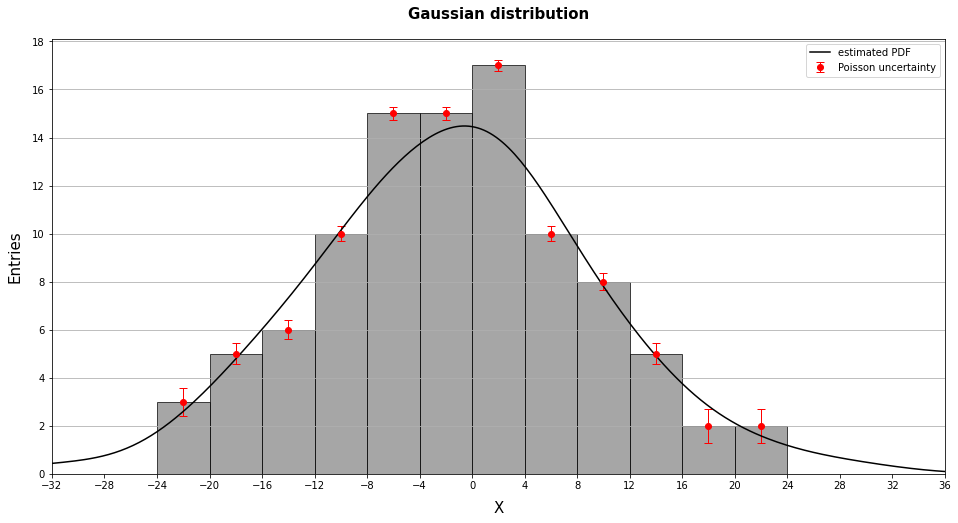

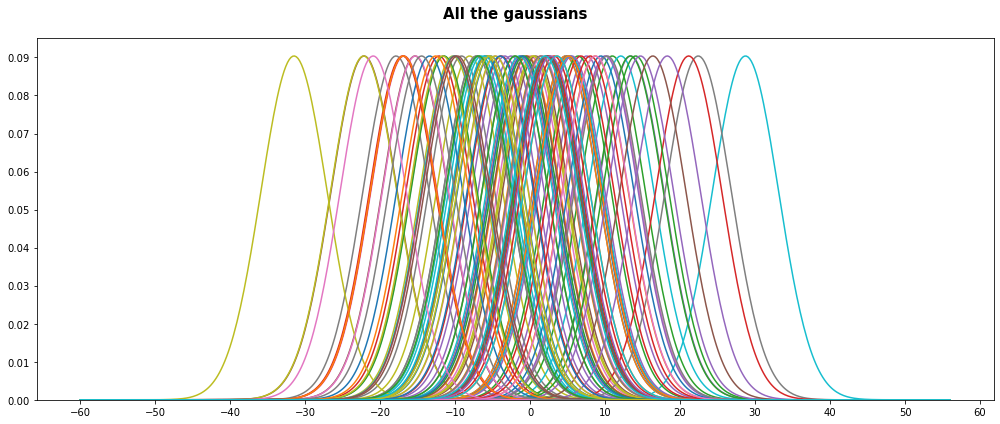

In [434]:
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
npr.seed(12)

def closest_multiple(multiple, number):
    sign = np.sign(number)
    factor = sign*math.ceil(number/multiple*sign)
    return int(factor*multiple)

N = 100
mean = 0
std = 10
x = np.random.normal(mean,std,N)

#bins
multiple = 4
upper_end = closest_multiple(multiple,x.max())
lower_end = closest_multiple(multiple,x.min())
upper_end = upper_end - multiple   #restrict range on the tail
lower_end = lower_end + 2*multiple #restrict range on the tail

bins = [x for x in range(lower_end,upper_end,multiple)]

#histogram
fig1 = plt.figure(figsize=(16, 8))
h, bins, _ = plt.hist(x, bins = bins,edgecolor = "black", color ='grey',alpha = 0.7 )
ax = fig1.axes[0]

#error bar
bin_center = 0.5*(bins[1:] + bins[:-1])
err = 1/np.sqrt(h) #Poisson uncertainty
ax.errorbar(bin_center, h, yerr=err, fmt='o', c='red', linewidth=1, capsize=4, label= "Poisson uncertainty")


#create a gaussian for every element of x
samples = 500
abscissa, step = np.linspace(lower_end*2.5,upper_end*2,samples,retstep=True)
std = 1.06 * np.std(x) * (len(x)**(-1./5))
all_gaussian = []
for i in range(len(x)):   
    gaussian = scipy.stats.norm.pdf(abscissa, x[i], std)
    all_gaussian.append(gaussian)


#plot all the gaussian
fig2, ax2 = plt.subplots(figsize=(14, 6))
for i in range(len(all_gaussian)):
    ax2.plot(abscissa,all_gaussian[i])

#sum all the gaussian
all_gaussian = np.array(all_gaussian)
all_gaussian = np.sum(all_gaussian,axis=0)

#integral
integral_all_gaussian = scipy.integrate.trapezoid(all_gaussian,dx = step)
integral_histogram = np.sum(multiple*h)
factor = integral_histogram/integral_all_gaussian
ax.plot(abscissa,all_gaussian*factor, label = "estimated PDF", color = "black")


#labels fig1
ax.set_title('Gaussian distribution', size = 15, fontweight ="bold", pad=20)
ax.set_xlabel('X', size = 15, labelpad  = 10)
ax.set_ylabel('Entries', size = 15, labelpad  = 10)

#options fig1
ax.set_xlim(lower_end-2*multiple, upper_end+2*multiple)
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.grid()

#labels fig2
ax2.set_title('All the gaussians', size = 15, fontweight ="bold", pad=20)

#options fig2
ax2.xaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(0.01))
ax2.set_ylim(0,0.095)


#plot
ax.legend()
fig.tight_layout()    
fig2.tight_layout()
